<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q3 Extract Text from Images (35 points, write-up)

**Please include all the answers to the write-up questions to HW3:PDF**. 
![](figures/annotatedLetters.jpg)
<center>Sample image with handwritten characters annotated with boxes around each character</center>

Now that you have a network that can recognize handwritten letters with reasonable accuracy, you can now use it to parse text in an image. Given an image with some text on it, our goal is to have a function that returns the actual text in the image. However, since your neural network expects a a binary image with a single character, you will need to process the input image to extract each character. There are various approaches that can be done so feel free to use any strategy you like.

Here we outline one possible method, another is that given in a [tutorial](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html)
1. Process the image ([blur](http://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html), [threshold](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.try_all_threshold), [opening morphology](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.opening), etc. (perhaps in that order)) to classify all pixels as being part of a character or background.
2. Find connected groups of character pixels (see [skimage.measure.label](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label)). Place a bounding box around each connected component.
3. Group the letters based on which line of the text they are a part of, and sort each group so that the letters are in the order they appear on the page.
4. Take each bounding box one at a time and resize it to $32\times 32$, classify it with your network, and report the characters in order (inserting spaces when it makes sense).

Since the network you trained likely does not have perfect accuracy, you can expect there to be some errors in your final text parsing. Whichever method you choose to implement for the character detection, you should be able to place a box on most of there characters in the image. We have provided you with **01\_list.jpg**, **02\_letters.jpg**, **03\_haiku.jpg** and **04\_deep.jpg** to test your implementation on.

### Q3.1 (3 points, write-up)
The method outlined above is pretty simplistic, and makes several assumptions. What are two big assumptions that the sample method makes. In your writeup, include two example images where you expect the character detection to fail (either miss valid letters, or respond to non-letters).

<font color="red">**Please include your answer to HW3:PDF**</font>

### Q3.2 (13 points, write-up + code)
Find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image \texttt{im}. Each row of the matrix should contain **[y1,x1,y2,x2]** the positions of the top-left and bottom-right corners of the box. The black and white image should be floating point, 0 to 1, with the characters in black and background in white. 

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

c:\Users\chris\anaconda3\envs\vision_conda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


[(6, 675, 137, 764), (18, 1293, 134, 1392), (19, 966, 142, 1063), (21, 1399, 146, 1501), (24, 769, 132, 862), (24, 1084, 136, 1181), (25, 1513, 138, 1595), (25, 1604, 131, 1702), (194, 85, 315, 181), (202, 294, 307, 387), (203, 412, 302, 478), (208, 761, 310, 831), (208, 1555, 300, 1628), (212, 1121, 292, 1193), (212, 1411, 294, 1475), (213, 518, 311, 578), (214, 1338, 301, 1421), (214, 1486, 296, 1545), (216, 930, 299, 1005), (219, 1185, 295, 1257), (220, 582, 318, 659), (223, 996, 300, 1067), (427, 1433, 520, 1513), (429, 1203, 512, 1270), (429, 1537, 515, 1616), (430, 1722, 530, 1783), (431, 1281, 543, 1349), (431, 1641, 534, 1708), (431, 1796, 512, 1876), (433, 1137, 512, 1202), (438, 994, 524, 1055), (442, 385, 538, 449), (442, 657, 532, 719), (444, 905, 530, 967), (445, 288, 534, 373), (445, 817, 530, 897), (446, 477, 538, 542), (446, 580, 522, 636), (447, 98, 557, 184), (584, 1293, 660, 1360), (585, 1089, 653, 1167), (589, 1167, 663, 1237), (590, 895, 668, 970), (592, 1504, 674,

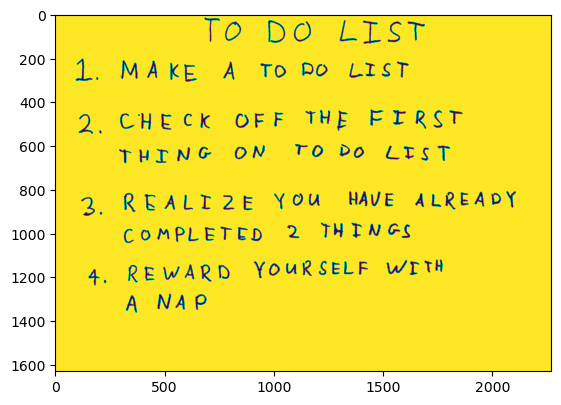

In [11]:
import numpy as np

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.segmentation
import skimage.exposure
import matplotlib.pyplot as plt

# takes a color image
# returns a list of bounding boxes and black_and_white image
def findLetters(image):
    bboxes = []
    bw = None

    # Preprocess the image
    blurred_img = skimage.filters.gaussian(image, sigma = 1)
    # plt.figure(0)
    # plt.imshow(blurred_img)
    gray_blurr  = skimage.color.rgb2gray(blurred_img)
    thresh      = skimage.filters.threshold_otsu(gray_blurr)
    thresh_img  = gray_blurr < thresh
    # plt.figure(1)
    # plt.imshow(thresh_img)
    closed_img  = skimage.morphology.closing(thresh_img)
    closed_img  = skimage.morphology.dilation(closed_img)
    # plt.figure(2)
    # plt.imshow(closed_img)
    preproc_img = closed_img

    labeled_img = skimage.measure.label(preproc_img)
    for region in skimage.measure.regionprops(labeled_img):
        if region.area > 100:
            minr, minc, maxr, maxc = region.bbox
            bboxes.append((max(0,minr-10), max(0,minc-10), min(image.shape[0],maxr+10), min(image.shape[1],maxc+10)))
    
    return bboxes, np.invert(preproc_img).astype("float")

img = skimage.io.imread("images/01_list.jpg")
bboxes, out_img = findLetters(img)
plt.imshow(out_img)
print(bboxes)

### Q3.3 (6 points, write-up + code)
Run `findLetters()` on all of the provided sample images in **images/**. Plot all of the located boxes on top of the image to show the accuracy of your `findLetters()` function. Include all the result images in your writeup.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

c:\Users\chris\anaconda3\envs\vision_conda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


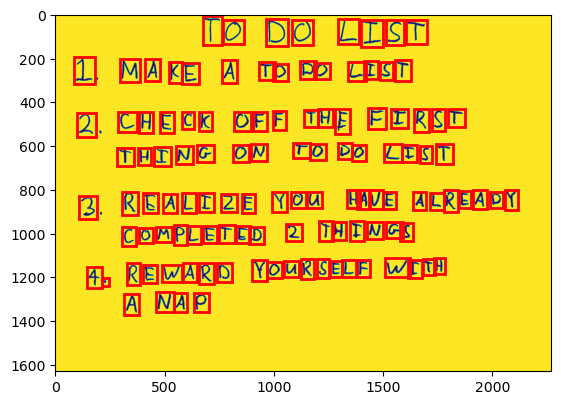

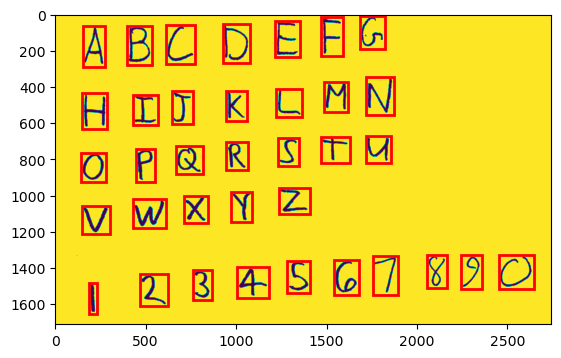

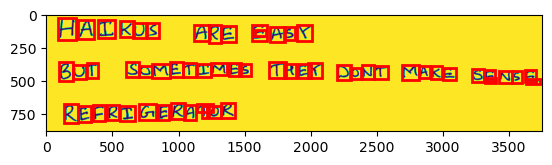

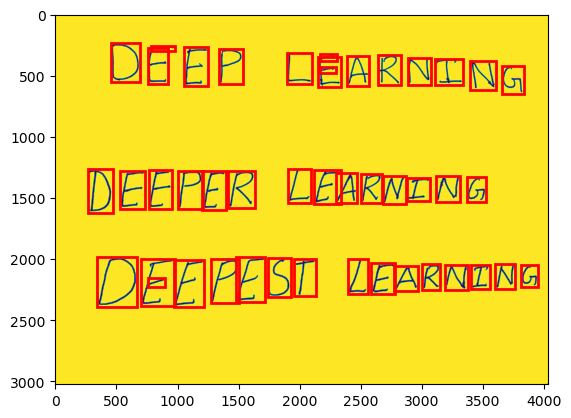

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches
import cv2

from ipynb.fs.defs.q1 import *

def extract_and_resize_patch(bw, bbox):
    minr, minc, maxr, maxc = bbox
    chip = bw[minr:maxr, minc:maxc] 
    chip_resized = skimage.transform.resize(chip, (30,30), anti_aliasing=True)
    pad_chip = np.pad(chip_resized, 1, "constant", constant_values=1)
    # cv2.imshow("Chip", skimage.img_as_ubyte(pad_chip.T))
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    return (pad_chip.T).flatten()

# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

heights = []
widths  = []
img_word_dict = {}
for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.imshow(bw)
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        heights.append(maxr - minr)
        widths.append(maxc - minc)
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()
    
    # Order the patches into order
    ordered_patches = []
    average_height = int(np.mean(np.array(heights)))
    average_width  = int(np.mean(np.array(widths)))

    rows = []
    for idx, bbox in enumerate(bboxes):
        minr, minc, maxr, maxc = bbox
        if idx == 0:
            row = [bbox]
        elif idx == len(bboxes) - 1:
            rows.append(row)
        else:
            lminr, lminc, lmaxr, lmaxc = bboxes[idx-1]
            if abs(minr - lminr) < average_height and abs(maxr - lmaxr) < average_height:
                row.append(bbox)
            else:
                rows.append(row)
                row = [bbox]
        
    # Sequential words in the rows
    words = []
    for row in rows:
        # Sort the columns
        np_row = np.array(row)
        sort_idxs = np.argsort(np_row[:, 1])
        np_row = np_row[sort_idxs, :]

        for idx, bbox in enumerate(np_row):
            minr, minc, maxr, maxc = bbox
            chip = extract_and_resize_patch(bw, bbox)
            if idx == 0:
                word = [chip]
            elif idx == np_row.shape[0] - 1:
                word.append(chip)
                words.append(word)
            else:
                lminr, lminc, lmaxr, lmaxc = np_row[idx-1]
                if abs(lmaxc - minc) < average_width:
                    word.append(chip)
                else:
                    words.append(word)
                    word = [chip]

    img_word_dict[img] = words
    import pickle
    with open("image_word_dict.pkl", "wb") as f:
        pickle.dump(img_word_dict, f)


    # find the rows using..RANSAC, counting, clustering, etc.
    # YOUR CODE HERE
    # raise NotImplementedError()
    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset


### Q3.4 (13 points, write-up + code)
Now you will load the image, find the character locations, classify each one with the network you trained in **Q2.1**, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. 

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

01_list.jpg
T0 DO LIST L HAKE A T0DO LIST 2 CHECK 0FE THE FIRST THING 0N T0O0 LIST 3 RKALIZE Y0U HAVE ALREADY C0MPLETED 2 IHINGS 4X REWARD Y0URSELFWITH NAP 
02_letters.jpg
A BC D E FG H IJ K L MW Q P Q R S TU V W X YZ Z 3 G S GT X7J 
03_haiku.jpg
HAIKUS ARE H MASX GUT SQMETIMES THEX D0WT MAK2 SGMNGGM RBFR GERA090R 
04_deep.jpg
V YVL C2KMIUG DHHTFK LEAKHING JYYPYST LEARNING 


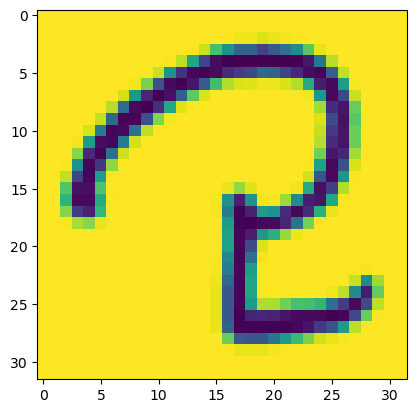

In [13]:
# load the weights
# run the crops through your neural network and print them out
import pickle
import string
import numpy as np
import ipynb
import nbimporter

def network_forward(X, params):
    layer_1_out = forward(X, params, name = "layer1", activation = sigmoid)
    out         = forward(layer_1_out, params, name = "output", activation = softmax)
    return out

letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
params = pickle.load(open('q2_weights.pickle','rb'))

# Predict the text for each image

for img in os.listdir('images'):
    print(img)
    content = ""
    for word in img_word_dict[img]:
        word_str = ""
        for letter in word:
            plt.imshow(letter.reshape(32, 32))
            pred = network_forward(letter.reshape(1, 1024), params)
            word_str += letters[np.argmax(pred)]
            pass
        content += word_str
        content += " "
    print(content)
